# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.

The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

### Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. 

In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups.

The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).

Being a data scientist in E-news Express, i have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1-Do the users spend more time on the new landing page than on the existing landing page?

2-Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3-Does the converted status depend on the preferred language? 

4-Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
df= pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

***Viewing the first and last few rows of the dataset***

In [84]:
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [85]:
df.tail(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Checking the shape of the dataset**

In [86]:
df.shape

(100, 6)

**Getting the statistical summary for the variables**

In [87]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Checking for duplicates***

In [88]:
df.duplicated().sum()

0

No duplicates are shown

***Checking for missing values***

In [89]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


No missing values, data is clean and ready for analysis

### Univariate Analysis

**Language preferred**

In [3]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

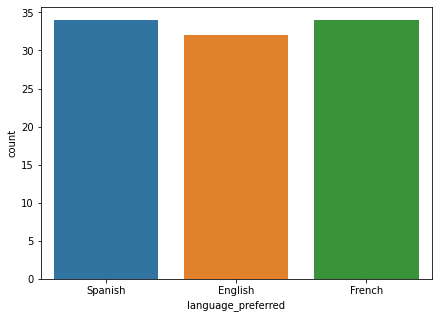

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df , x='language_preferred');

Number of users for different language are almost the same.

Spanish    34 users

French     34 users

English    32 users

***Users Converted to New landing Page***

In [6]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

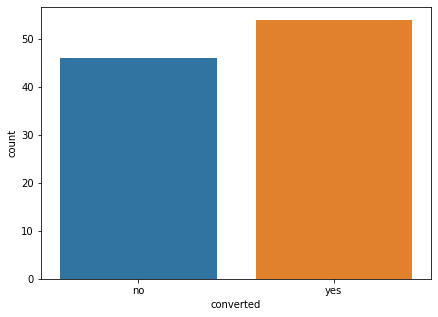

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df , x='converted');

54 Users out of 100 have converted to subscribers and 46 users did not.

**Time spent on the page**

In [5]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

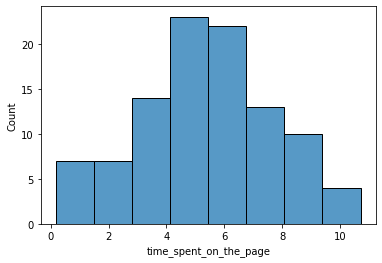

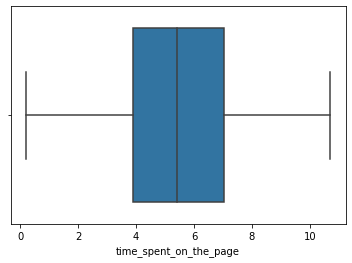

In [ ]:
sns.histplot(data=df , x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df ,x='time_spent_on_the_page')
plt.show();

The average time spent on the page is 5 mins and 37 secs,

however some users spent more time reached 10 mins 7 secs.

**Group**

In [6]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

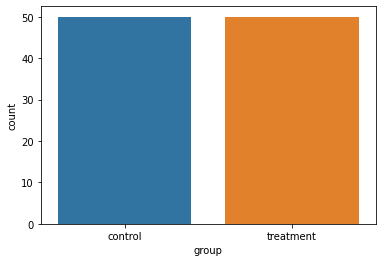

In [7]:
sns.countplot(data=df,x='group')
plt.show()

The sample is divided equally to 2 groups :Control(50 users) and Treatment (50 users).

**Landing Page**

In [7]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

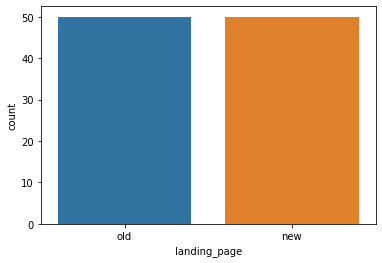

In [8]:
sns.countplot(data=df,x='landing_page')
plt.show()

The sample is divided equally between the new landing page (50 users) and the old landing page (50 users).

### Bivariate Analysis

Time spent on the page Vs Converted 

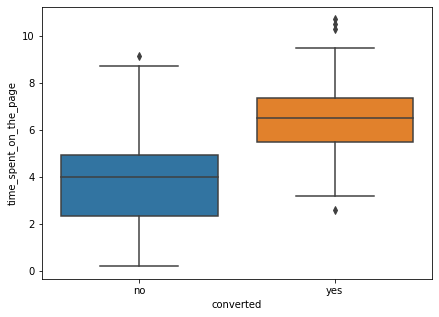

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show();

The graph shows that the users who converted to subscribe spent more time (7 mins on average) on the page than the existing page (4 mins on average).

Group Vs Converted 

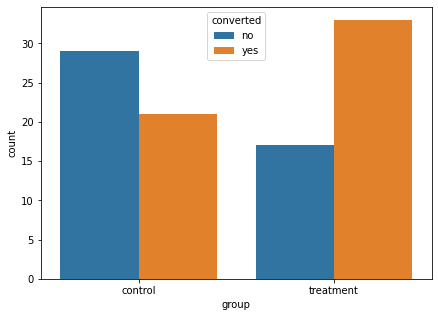

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df , x='group',hue='converted');

The graph shows that the users of group treatment converted more than users of group control.

More than 30 users in group treatment converted to subscribers.

Language preferred Vs Converted

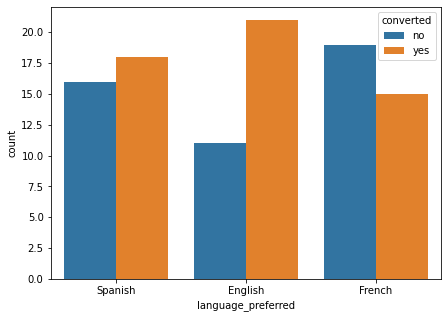

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df , x='language_preferred',hue='converted');

The graph shows that users who chose english language converted to subscribers more than the other languages.

Time spent on the page vs Landing page 

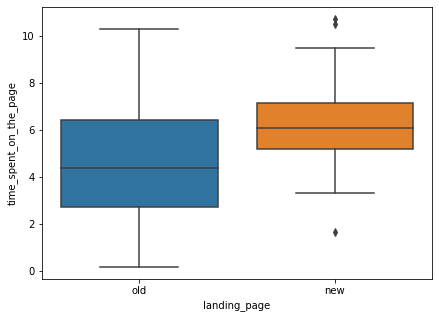

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(data = df, x = 'landing_page',y='time_spent_on_the_page')
plt.show()

Tha graph shows that users landing on new page spent more time(6 mins on average) than the old page (4.5 mins on average)

Time spent on the page Vs Group

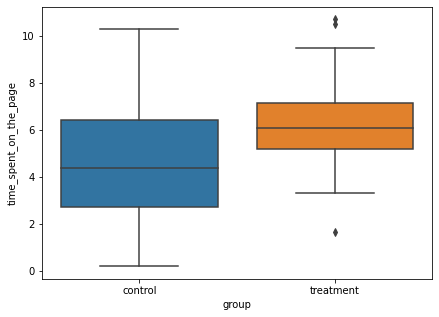

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.show();

The graph shows that the users of group treatment spent more time on the page ( 6 mins on average) than the users of group control (4.5 mins on average).

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

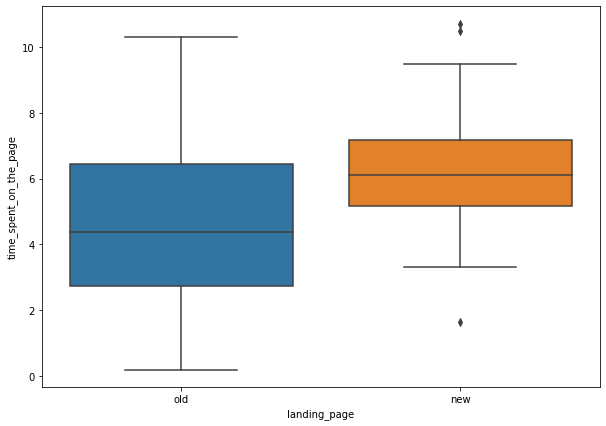

In [91]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show();

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:\mu_n=\mu_o$ (Mean of the new page = mean of the old page)

against the alternate hypothesis

>$H_a:\mu_n>\mu_o$ (Mean of the new page > mean of the old page)


### Step 2: Select Appropriate test

**Two Independent Sample T-test**

for Equality of Means and The population standard deviations are unknown

### Step 3: Decide the significance level

𝛂 = 0.05

### Step 4: Collect and prepare data

In [92]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [93]:
time_spent_new.std(),time_spent_old.std()

(1.8170310387878263, 2.581974849306046)

Based on the sample standard deviations of the two groups, the population standard deviations can be assumed to be unequal.

### Step 5: Calculate the p-value

In [94]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new,time_spent_old, equal_var = False, alternative='greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [95]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is much less than the level of significance 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to say that time spent on the new landing page is greater than the existing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

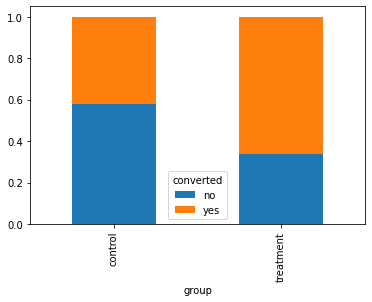

In [96]:
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind="bar",stacked=True);

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:p_n= p_o$ (proportion of new page = proportion of old page)

against the alternate hypothesis

>$H_a:p_n>p_o$ (proportion of new page > proportion of old page)

### Step 2: Select Appropriate test

***Two Proportion Z-test***

a one-tailed test concerning two population proportions from two independent populations.

### Step 3: Decide the significance level

𝛂 = 0.05

### Step 4: Collect and prepare data

In [97]:
df_old= df[df['group']=='control']

In [98]:
old_converted=df_control['converted'].value_counts()['yes']

In [99]:
old_converted

21

In [100]:
df_new= df[df['group']=='treatment']

In [101]:
new_converted=df_treatment['converted'].value_counts()['yes']

In [102]:
new_converted

33

In [103]:
n_control = df.group.value_counts()['control'] 
n_treatment= df.group.value_counts()['treatment']


In [104]:
n_control,n_treatment

(50, 50)

In [105]:
new_converted,old_converted

(33, 21)

### Step 5: Calculate the p-value

In [106]:
from statsmodels.stats.proportion import proportions_ztest

In [107]:
count = np.array([new_converted,old_converted])

In [108]:
nobs=np.array([n_treatment,n_control])

In [109]:
test_stat, p_value = proportions_ztest(count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [110]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is much less than the level of significance 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to say that the conversion rate of the new landing page is greater than the existing page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

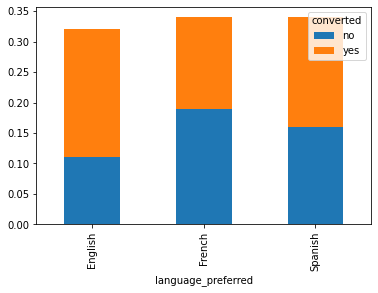

In [111]:
pd.crosstab(df['language_preferred'], df['converted'],normalize=True).plot(kind='bar',stacked=True);

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ the conversion status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ the conversion status depends on preferred language.

### Step 2: Select Appropriate test

***Chi-Square Test for Independence***

The test of independence, concerning two categorical variables: Converstion status and the language preferred. 

### Step 3: Decide the significance level

𝛂 = 0.05

### Step 4: Collect and prepare data

In [112]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [113]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("p-value =",p_value)

p-value = 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [114]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than the significance level 0.05, we fail to reject the null hypothesis. Thus,we do not have enough statistical significance to conclude that the conversion depends on preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [115]:
df_new=df[df['landing_page']=='new']

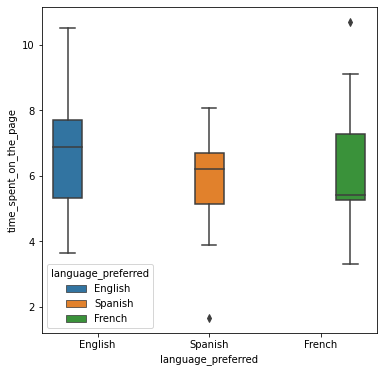

In [116]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_new, hue = 'language_preferred')
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0: \mu_f=\mu_e=\mu_s$ (mean of french users= mean of english users = mean of spanish users)

against the alternate hypothesis

>$H_a:$At least one of the languages preferred is different from the rest

### Step 2: Select Appropriate test

***One-way ANOVA Test***

The test is concerning three population means. 

### Step 3: Decide the significance level

𝛂 = 0.05

### Step 4: Collect and prepare data

In [117]:
df_new=df[df['landing_page']=='new']

In [118]:
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


Checking the normallity of the time spent distribution

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time spent on the new page does not follow a normal distribution

In [119]:
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

Checking the population variances 



### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [120]:
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Step 5: Calculate the p-value

In [121]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [122]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than the significance level 0.05, we fail reject the null hypothesis. Thus,we do have enough statistical significance to conclude that the time spent on the new page is the same for the different language users.

## Conclusion and Business Recommendations

**Conclusion**

1-Based on the sample data,the new page is more engaging and attractive to the users;The time spent on the new landing page is greater than the existing page.

2-The users of the new page turns to subscribers more than the old page; The conversion rate of the new landing page is greater than the existing page. 

3-The language preferred doesn't show an effect on the subscriptions; we do not have enough statistical significance to conclude that the conversion depends on preferred language.

4-Most of the users for the different language spent the same time on the new page.

**Business Recommendations**

By studing the whole statistical evidences of the difference between the new landing page and the existing one ,to determine the effectiveness of the new landing page in gathering new subscribers for the news portal and how the users are behaving in each one 
i recommend to The executives at E-news Express to consider the new page as 
it is designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

